In [1]:
# Use the following data for this assignment:

import pandas as pd
import numpy as np

np.random.seed(12345)

df = pd.DataFrame([np.random.normal(32000,200000,3650), 
                   np.random.normal(43000,100000,3650), 
                   np.random.normal(43500,140000,3650), 
                   np.random.normal(48000,70000,3650)], 
                  index=[1992,1993,1994,1995])

df

,0,1,2,3,4,5,6,7,8,9,...,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649
1992,-8941.531897,127788.667612,-71887.743011,-79146.060869,425156.114501,310681.166595,50581.575349,88349.230566,185804.513522,281286.947277,...,171938.760289,150650.759924,203663.976475,-377877.158072,-197214.093861,24185.008589,-56826.729535,-67319.766489,113377.299342,-4494.878538
1993,-51896.094813,198350.518755,-123518.252821,-129916.759685,216119.147314,49845.883728,149135.648505,62807.672113,23365.577348,-109686.264981,...,-44566.520071,101032.122475,117648.199945,160475.622607,-13759.888342,-37333.493572,103019.841174,179746.127403,13455.493990,34442.898855
1994,152336.932066,192947.128056,389950.263156,-93006.152024,100818.575896,5529.230706,-32989.370488,223942.967178,-66721.580898,47826.269111,...,165085.806360,74735.174090,107329.726875,199250.734156,-36792.202754,-71861.846997,26375.113219,-29328.078384,65858.761714,-91542.001049
1995,-69708.439062,-13289.977022,-30178.390991,55052.181256,152883.621657,12930.835194,63700.461932,64148.489835,-29316.268556,59645.677367,...,-13901.388118,50173.686673,53965.990717,4128.990173,72202.595138,39937.199964,139472.114293,59386.186379,73362.229590,28705.082908


In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
import scipy.stats as stats
import matplotlib.patches as mpatches

X = range(1992, 1996)

mean = df.mean(axis = 1)
std = df.std(axis = 1)
n = df.shape[1]
yerr90 = std / np.sqrt(n) * stats.t.ppf(1-0.1/2, n - 1)
yerr95 = std / np.sqrt(n) * stats.t.ppf(1-0.05/2, n - 1)
yerr99 = std / np.sqrt(n) * stats.t.ppf(1-0.01/2, n - 1)
bars = []
colors = ['#67001f', '#d6604d', '#fddbc7', '#f7f7f7', '#d1e5f0', '#4393c3', '#053061']
patches = []

patches.append(mpatches.Patch(color=colors[0], label='Value below 99% CI'))
patches.append(mpatches.Patch(color=colors[1], label='Value below 95% CI'))
patches.append(mpatches.Patch(color=colors[2], label='Value below 90% CI'))
patches.append(mpatches.Patch(color=colors[3], label='Value in 90% CI'))
patches.append(mpatches.Patch(color=colors[4], label='Value above 90% CI'))
patches.append(mpatches.Patch(color=colors[5], label='Value above 95% CI'))
patches.append(mpatches.Patch(color=colors[6], label='Value above 99% CI'))



def plot_df(yval):

    global bars
    bars = plt.bar(X, mean, width=0.75, yerr=yerr95)
    line.set_ydata(yval)
    plt.gca().set_title('Distributions mean and confidence interval')
    plt.legend(handles=patches, bbox_to_anchor=(1, 1))
    plt.subplots_adjust(right=0.66)
    plt.xticks(X)

def set_colors(yval):    
    for idx, bar in enumerate(bars):
        # x < mean - 99
        if yval < mean.iloc[idx] - yerr99.iloc[idx]:
            color = colors[0]
        # mean - 99 <= x < mean - 95
        elif (mean.iloc[idx] - yerr99.iloc[idx] <= yval) & (yval < mean.iloc[idx] - yerr95.iloc[idx]):
            color =  colors[1]
        # mean - 95 <= x < mean - 90
        elif (mean.iloc[idx] - yerr95.iloc[idx] <= yval) & (yval < mean.iloc[idx] - yerr90.iloc[idx]):
            color =  colors[2]
        # mean - 90 <= x <= mean + 90
        elif (mean.iloc[idx] - yerr90.iloc[idx] <= yval ) & (yval <= mean.iloc[idx] + yerr90.iloc[idx]):
            color =  colors[3]
        # mean + 90 < x <= mean + 95
        elif (mean.iloc[idx] + yerr90.iloc[idx] < yval) & (yval <= mean.iloc[idx] + yerr95.iloc[idx]):
            color =  colors[4]
        # mean + 95 < x < mean + 99
        elif (mean.iloc[idx] + yerr95.iloc[idx] < yval) & (yval <= mean.iloc[idx] + yerr99.iloc[idx]):
            color =  colors[5]
        # mean + 99 < x
        else:
            color =  colors[6]
            
        bars[idx].set_color(color)
    plt.gca().set_title('Distributions mean and confidence interval\nValue selected: {}'.format(int(round(yval))))


def on_click(event):
    line.set_ydata(event.ydata)
    set_colors(event.ydata)


<IPython.core.display.Javascript object>


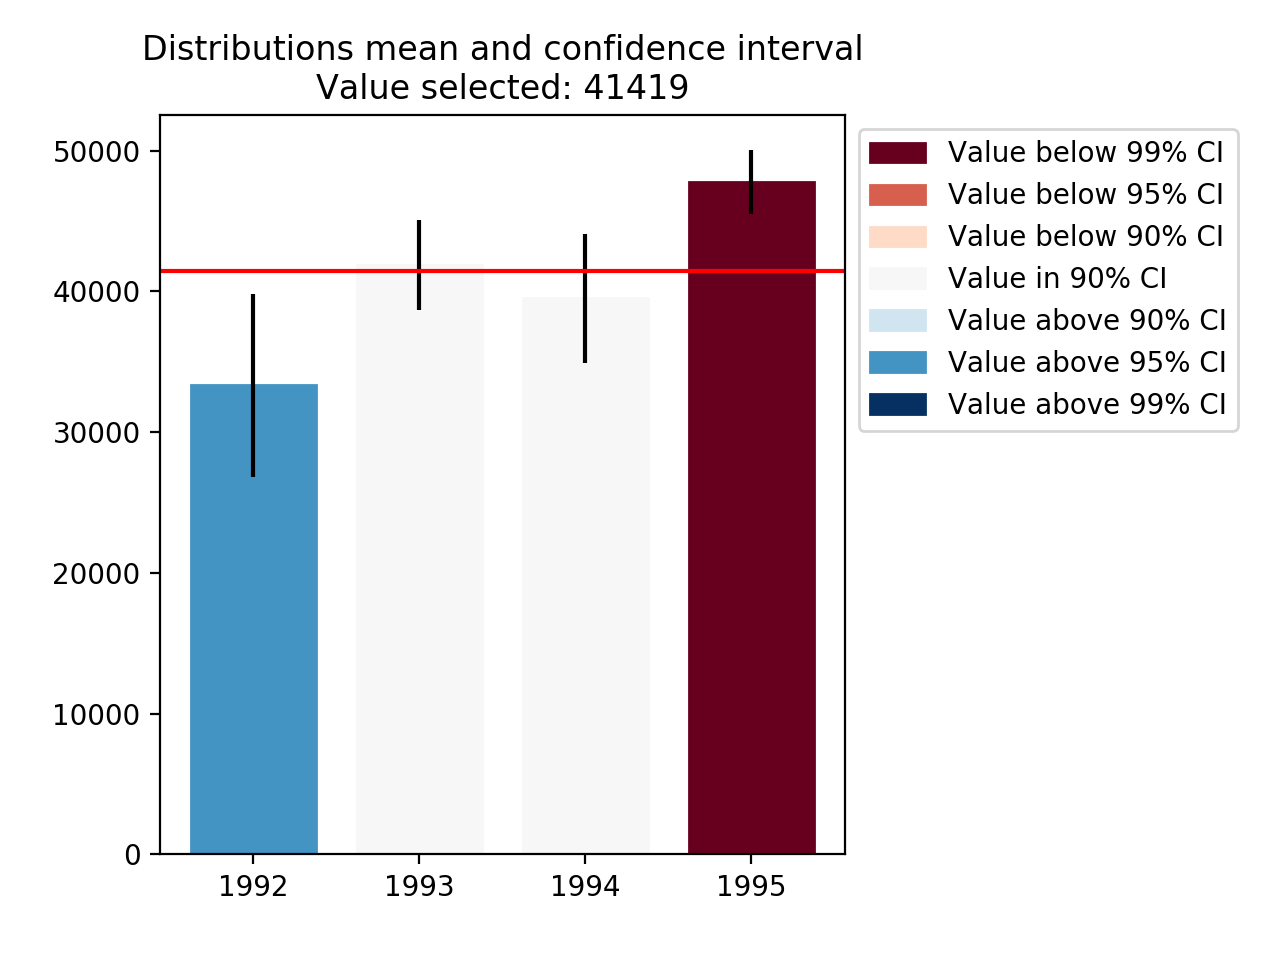

7

In [3]:
line = plt.axhline(y=0, color='red')
plot_df(0)
plt.gcf().canvas.mpl_connect('button_press_event', on_click)
